In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import joblib

In [7]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [9]:
df=pd.DataFrame(data)

In [11]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [17]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [21]:
df.shape

(205, 26)

In [23]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [25]:
df=df.drop(columns=['car_ID'])

In [27]:
df.duplicated().sum()

0

In [37]:
categorical_features = ['CarName', 'fueltype', 'aspiration', 'doornumber', 
                        'carbody', 'drivewheel', 'enginelocation', 'enginetype', 
                        'cylindernumber', 'fuelsystem']
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

In [43]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [45]:
num_cols=df.select_dtypes(include=['number'])
num_cols

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


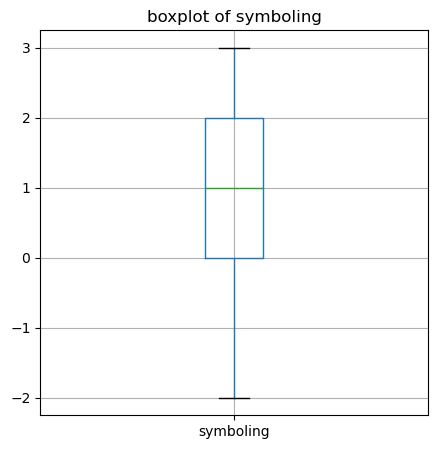

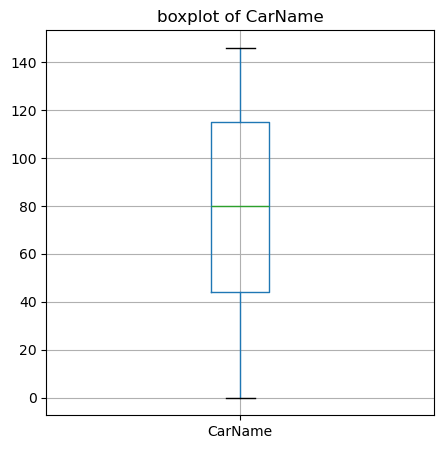

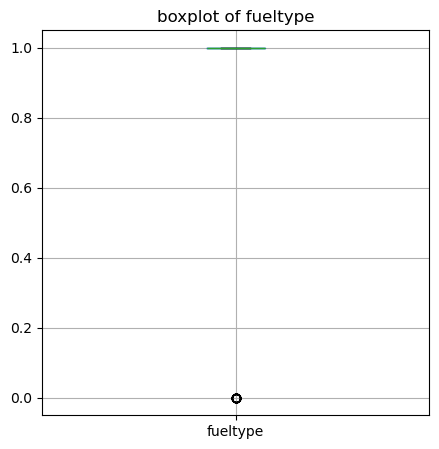

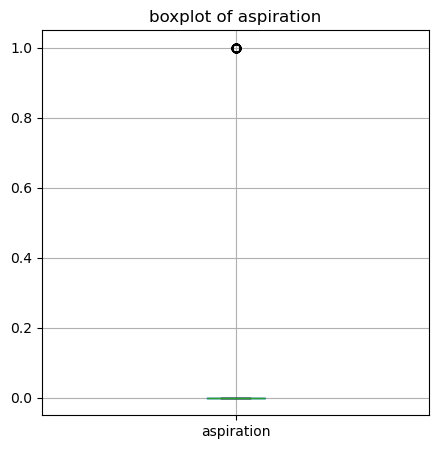

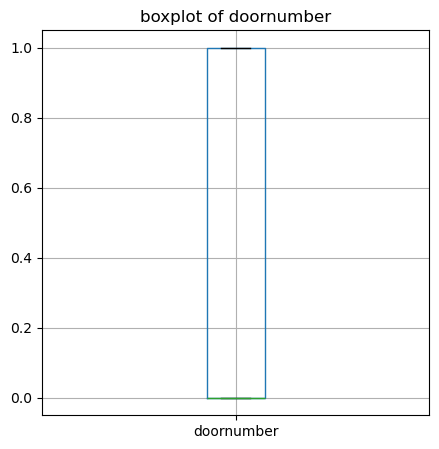

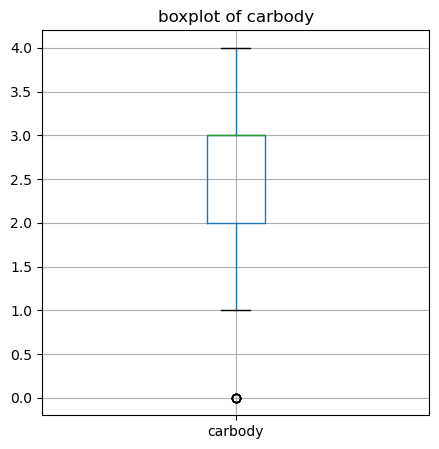

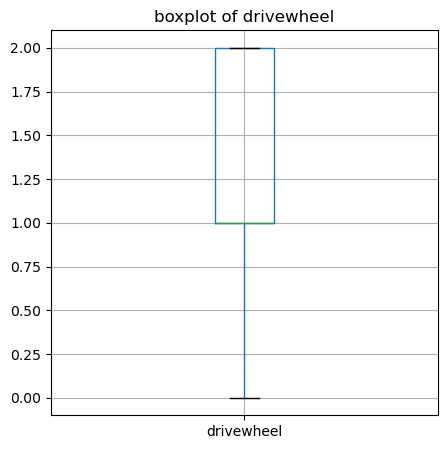

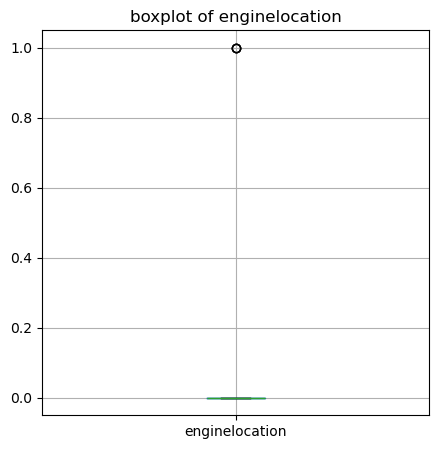

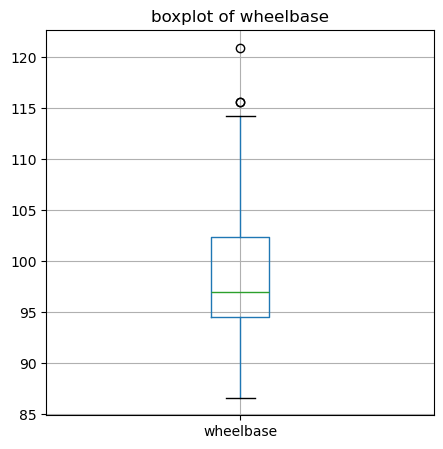

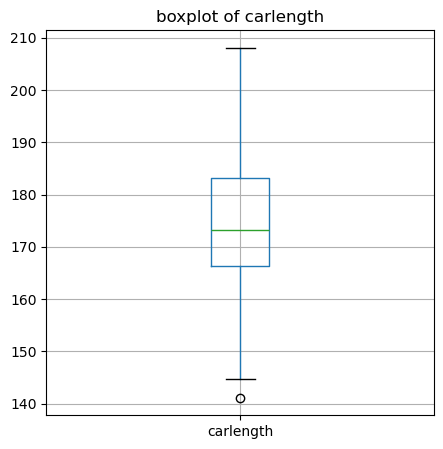

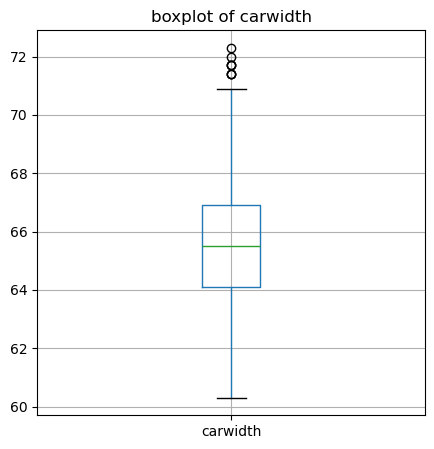

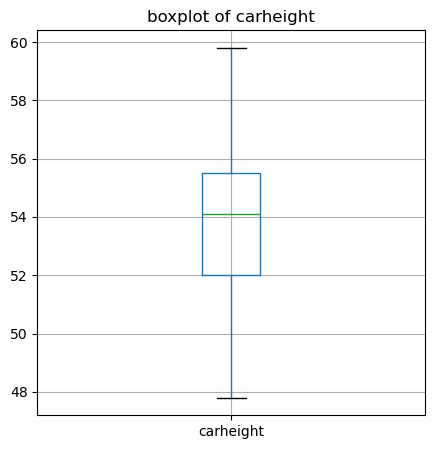

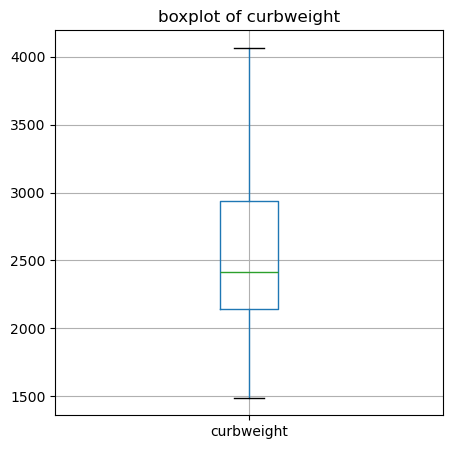

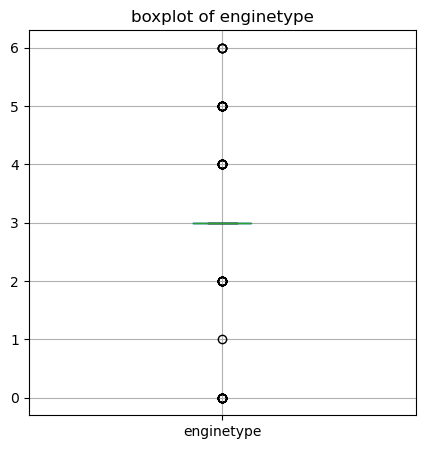

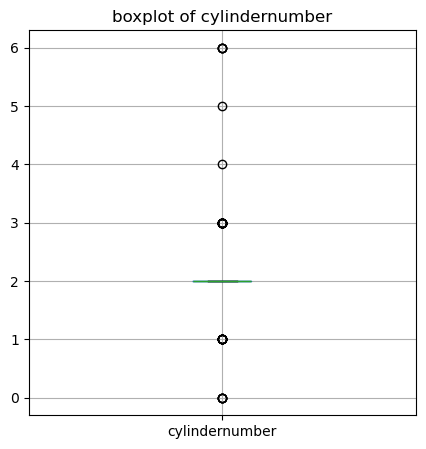

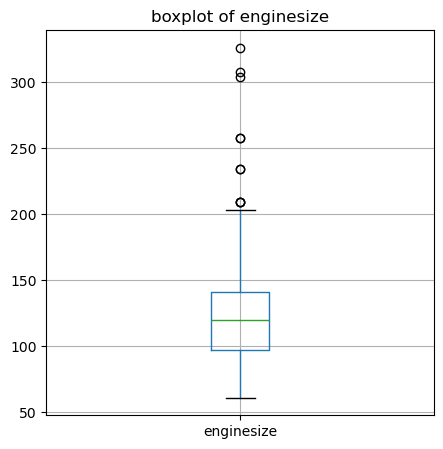

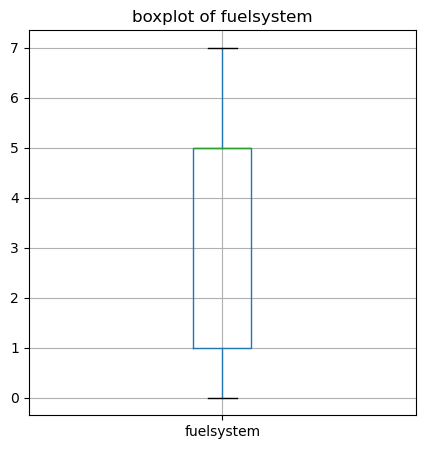

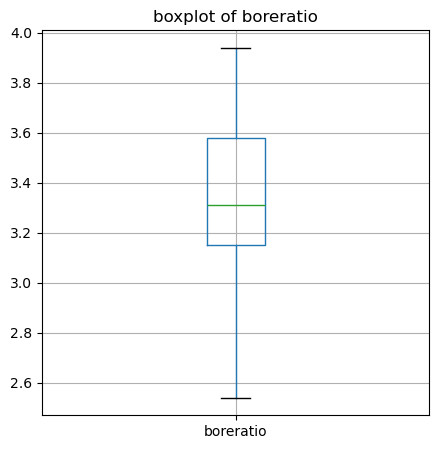

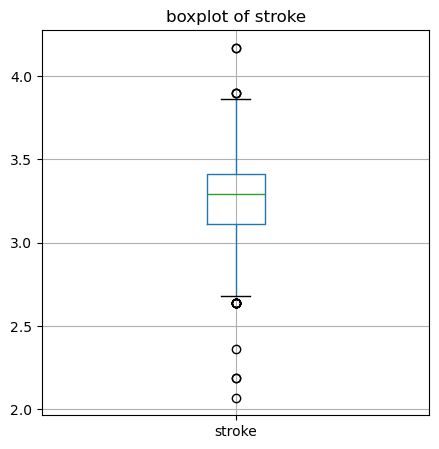

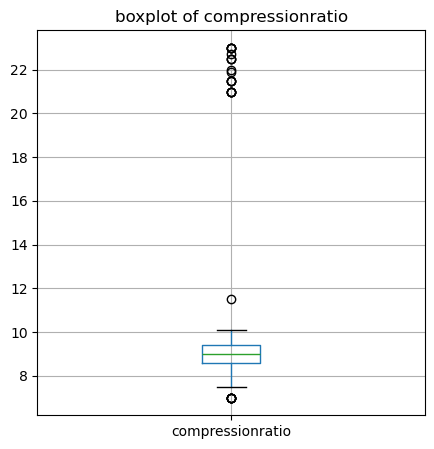

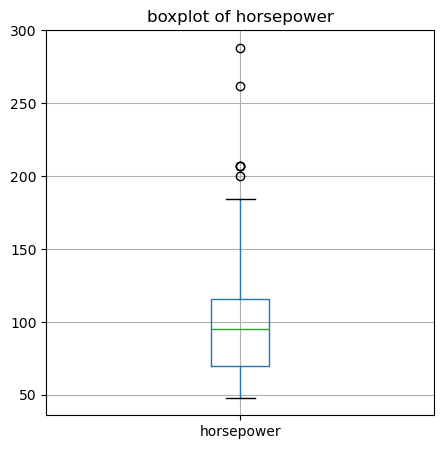

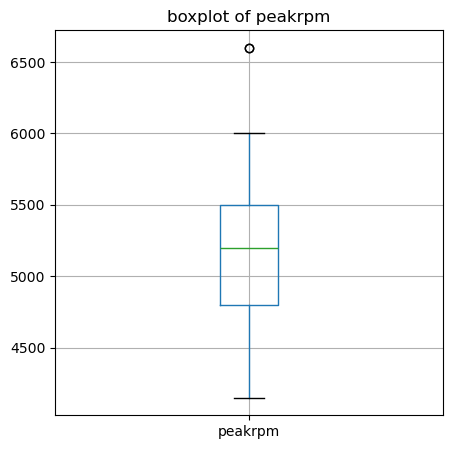

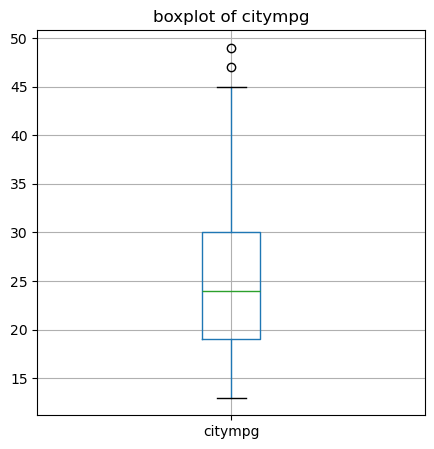

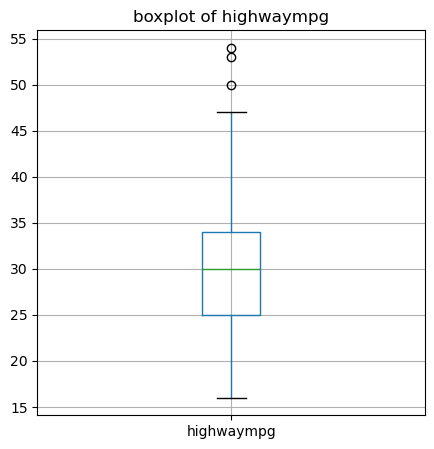

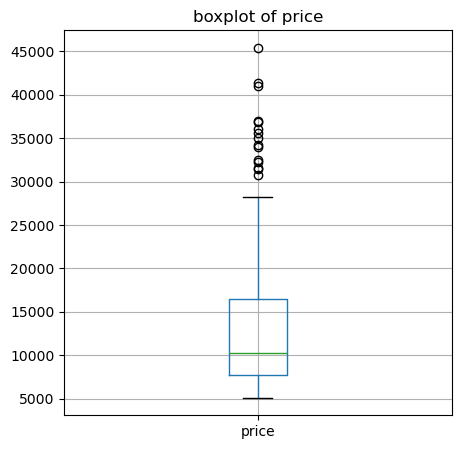

In [47]:
for column in num_cols.columns:
    plt.figure(figsize=(5,5))
    num_cols.boxplot(column = column)
    plt.title(f'boxplot of {column}')

In [51]:
def Handling_Outliers(df):
    for col in df.select_dtypes(include = ['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        df[col]= df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return df

In [53]:
df1=Handling_Outliers(df)

<Axes: >

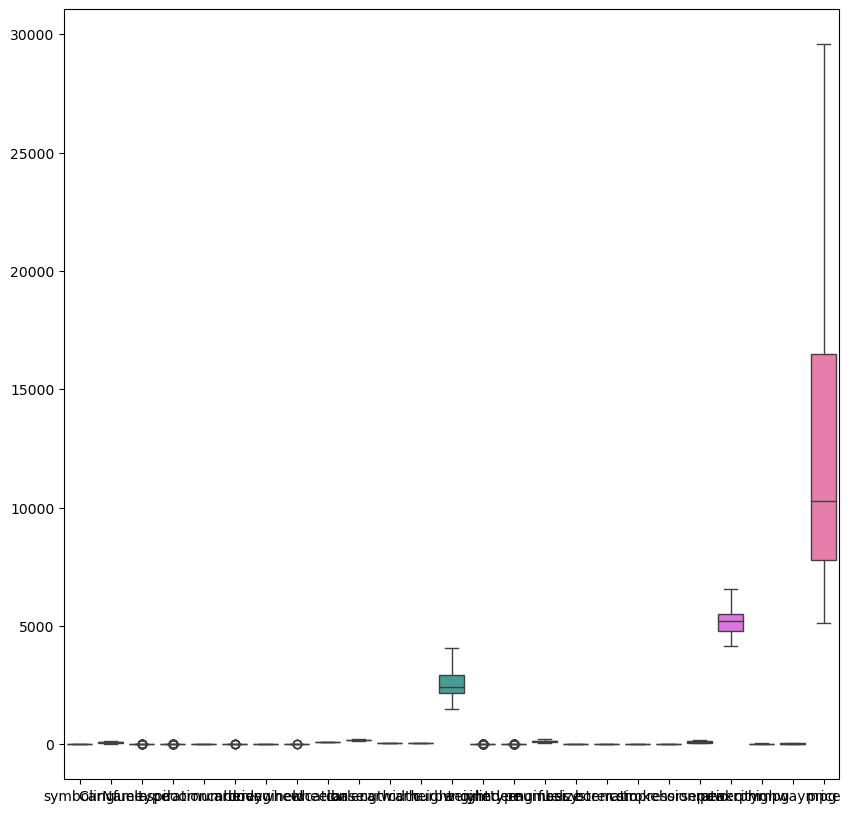

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot(df1)

In [57]:
df1.skew()

symboling           0.211072
CarName            -0.157649
fueltype           -2.732619
aspiration          1.673832
doornumber          0.247552
carbody            -0.665301
drivewheel         -0.058352
enginelocation      8.143531
wheelbase           0.924916
carlength           0.155954
carwidth            0.776278
carheight           0.063123
curbweight          0.681398
enginetype         -0.535603
cylindernumber      2.144253
enginesize          0.908453
fuelsystem         -0.242995
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               1.222031
dtype: float64

In [59]:
pt=PowerTransformer(method='yeo-johnson')

In [63]:
numerical_features = df1.select_dtypes(include=['int64','float64']).columns

In [65]:
df1[numerical_features] = pt.fit_transform(df1[numerical_features])

In [67]:
df1[numerical_features].skew()

symboling          -0.064508
wheelbase           0.003159
carlength          -0.000424
carwidth            0.000000
carheight          -0.002653
curbweight          0.024871
enginesize          0.021314
boreratio          -0.011526
stroke              0.011287
compressionratio    0.001809
horsepower          0.044124
peakrpm            -0.002338
citympg             0.000325
highwaympg         -0.006936
price               0.081616
dtype: float64

In [69]:
corr=df1.corr()

In [71]:
corr

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.129184,0.194092,-0.074304,0.659611,-0.583563,-0.066606,0.199537,-0.561041,-0.373738,...,-0.164886,0.061070,-0.157331,0.008447,-0.064772,0.005957,0.272725,-0.028024,0.052766,-0.122447
CarName,-0.129184,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.076959,0.063663,...,-0.039625,0.123845,0.188350,-0.181985,0.147534,-0.098613,-0.138871,0.135131,0.136900,-0.105980
fueltype,0.194092,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.289818,-0.211220,...,-0.122906,0.041529,-0.054209,-0.266984,-0.643625,0.194450,0.482198,-0.250267,-0.180957,-0.147457
aspiration,-0.074304,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.247710,0.233293,...,0.204350,0.288086,0.211885,0.256013,-0.145802,0.306173,-0.184721,-0.193889,-0.252447,0.297643
doornumber,0.659611,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.468914,-0.400077,...,-0.092475,0.015519,-0.120626,0.024459,-0.067942,0.062201,0.247241,-0.014229,0.022037,-0.122685
carbody,-0.583563,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.439558,0.333616,...,-0.030131,-0.065079,0.011523,-0.015289,0.051653,-0.114039,-0.109544,0.048875,0.001522,0.006961
drivewheel,-0.066606,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.394603,0.481274,...,0.512441,0.424686,0.480685,0.066765,0.126895,0.536554,-0.043509,-0.472787,-0.467748,0.599439
enginelocation,0.199537,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.254478,-0.048265,...,0.207880,0.105971,0.183711,-0.157117,0.071374,0.217632,0.197442,-0.171844,-0.102007,0.214226
wheelbase,-0.561041,0.076959,-0.289818,0.247710,-0.468914,0.439558,0.394603,-0.254478,1.000000,0.864441,...,0.557667,0.396651,0.473830,0.204289,-0.007564,0.433433,-0.352138,-0.460284,-0.529014,0.605542
carlength,-0.373738,0.063663,-0.211220,0.233293,-0.400077,0.333616,0.481274,-0.048265,0.864441,1.000000,...,0.739176,0.562811,0.610873,0.161858,-0.067316,0.646672,-0.288063,-0.673999,-0.709843,0.789525


Text(0.5, 1.0, 'Correlation Of car')

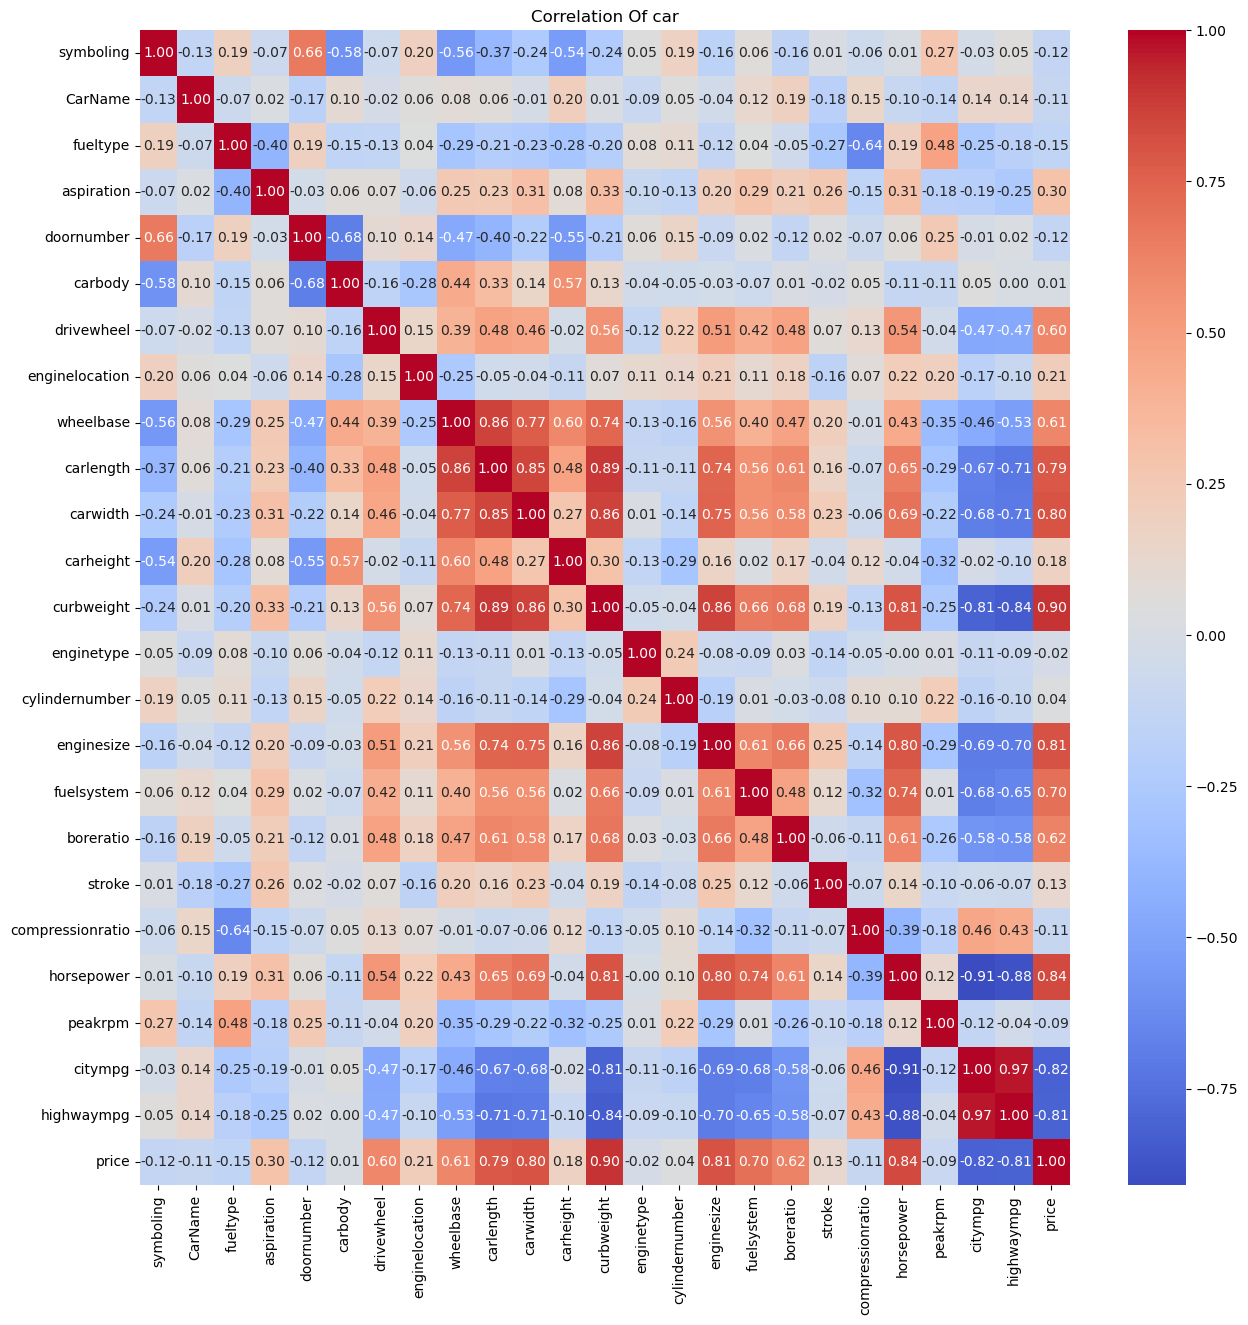

In [77]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Of car')

In [79]:
X = df.drop(columns=['price'])
y = df['price']

In [81]:
sk=SelectKBest(score_func=f_regression,k=10)

In [83]:
X_new=sk.fit_transform(X,y)

In [85]:
selected_features = X.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': X.columns,'Score': sk.scores_}).sort_values(by='Score',ascending=False)
print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')

Feature Scores:
             Feature       Score
12        curbweight  907.059525
20        horsepower  495.002063
22           citympg  412.239963
15        enginesize  383.508860
23        highwaympg  382.900254
10          carwidth  370.267877
9          carlength  335.961288
16        fuelsystem  189.999589
17         boreratio  127.003580
8          wheelbase  117.533665
6         drivewheel  113.854114
3         aspiration   19.732119
7     enginelocation    9.764377
11         carheight    6.959996
2           fueltype    4.512023
18            stroke    3.283776
4         doornumber    3.102152
0          symboling    3.089960
1            CarName    2.305941
19  compressionratio    2.285581
21           peakrpm    1.672592
14    cylindernumber    0.254484
13        enginetype    0.091701
5  

In [87]:
X_select=X[selected_features]

In [89]:
X_select.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')

In [91]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_select)

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [95]:
print(f"""
X train shape : {X_train.shape}
X test shape : {X_test.shape} 
Y train shape : {y_train.shape}
y test shape : {y_test.shape}
""")


X train shape : (164, 10)
X test shape : (41, 10) 
Y train shape : (164,)
y test shape : (41,)



In [97]:
models={
    '1.linear regression':LinearRegression(),
    '2.decision tree regressor':DecisionTreeRegressor(),
    '3.random forest regressor':RandomForestRegressor(),
    '4.gradient boosting regressor':GradientBoostingRegressor(),
    '5.svr':SVR()
}

In [99]:
result={}
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    result[model_name]={'mae':mae,'mse':mse,'rmse':rmse,'r2':r2}

In [101]:
result_df=pd.DataFrame(result).T
print (result_df)

                                    mae       mse      rmse        r2
1.linear regression            0.314164  0.155798  0.394713  0.840163
2.decision tree regressor      0.212179  0.073630  0.271348  0.924462
3.random forest regressor      0.192343  0.060736  0.246447  0.937690
4.gradient boosting regressor  0.211267  0.068206  0.261163  0.930026
5.svr                          0.331934  0.223800  0.473075  0.770399


In [133]:
best_model=result_df.sort_values(by='r2',ascending=False).iloc[0]
print("best_model",best_model)

best_model mae     0.192343
mse     0.060736
rmse    0.246447
r2      0.937690
Name: 3.random forest regressor, dtype: float64


In [103]:
#Hyperparameter tuning
rfg = RandomForestRegressor(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)

In [105]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [111]:
grid_search = GridSearchCV(
    estimator=rfg,
    param_grid=param_grid,
    cv=5,  
    scoring='r2',  
    n_jobs=-1, 
    verbose=2   
)

In [113]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, max_features='sqrt',
                                             min_samples_leaf=2,
                                             min_samples_split=5,
                                             n_estimators=50, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=2)

In [115]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.9023014640039296
